# Data Preparation and Visualization

We will handle the data using the Pandas and Numpy libraries. Pandas is the Python Data Analysis Library (https://pandas.pydata.org) It is a very useful that can handle large data, time series data, etc. We will follow the introduction to Pandas provided by Wes McKinny and his book "Python for Data Analysis". For Numpy (http://www.numpy.org), it is a library that provides basic statistical computation tools  

Then, we will use Matplotlib (https://matplotlib.org) and Seaborn (https://seaborn.pydata.org) for the data visualization. These two libraries are the commonly used libraries for many data visualization notebooks found on Kaggle website. 



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#Show graphs withint Python notebook

%matplotlib inline

Next, we will look at how to use data frame for 

### Data: Medical Claim Data

The first data that we will play around with is the medical claim data. You can take a look at the csv file in the data folder. Note that, to import the data into the data frame Pandas has an API read_csv. It can also import data from many other file types, and databases.  

In [7]:
df = pd.read_csv('data/insurance_add_step.csv')
df.columns #list columns' names

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [8]:
df.head(10) #view the sample data from the header

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19.0,0,27.900,3009.0,0.0,1,southwest,16884.92400,1.0
1,18.0,male,33.770,3008.0,1.0,0,southeast,1725.55230,1.0
2,28.0,male,33.000,3009.0,3.0,0,southeast,4449.46200,0.0
3,33.0,male,22.705,10009.0,NaN,0,northwest,21984.47061,0.0
4,32.0,male,28.880,8010.0,NaN,0,northwest,3866.85520,1.0
5,31.0,female,25.740,8005.0,0.0,0,southeast,3756.62160,0.0
6,46.0,female,33.440,3002.0,1.0,0,southeast,8240.58960,1.0
7,37.0,female,27.740,8007.0,3.0,0,northwest,7281.50560,0.0
8,37.0,male,29.830,8002.0,2.0,0,northeast,6406.41070,0.0
9,60.0,female,25.840,5008.0,0.0,0,northwest,28923.13692,0.0


In [9]:
#List the types of all columns
df.dtypes

age               float64
sex                object
bmi               float64
steps             float64
children          float64
smoker              int64
region             object
charges           float64
insuranceclaim    float64
dtype: object

In [10]:
#List the row labels and the column names
df.axes

[RangeIndex(start=0, stop=1344, step=1),
 Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
        'insuranceclaim'],
       dtype='object')]

In [11]:
#Number of dimensions
df.ndim

2

In [12]:
#Total number of elements in the Data Frame
df.size

12096

In [13]:
#Number of rows and columns
df.shape

(1344, 9)

In [14]:
#Output basic statistics for the numeric columns
df.describe()

,age,bmi,steps,children,smoker,charges,insuranceclaim
count,1339.000000,1344.000000,1331.000000,1240.000000,1344.000000,1342.000000,1342.000000
mean,39.222554,30.659446,5358.096920,1.185484,0.203869,13265.808050,0.584948
std,14.073363,6.093595,2456.921349,1.209773,0.403023,12098.073122,0.492915
min,18.000000,15.960000,2908.000000,0.000000,0.000000,1121.873900,0.000000
25%,26.500000,26.308750,3009.000000,0.000000,0.000000,4740.287150,0.000000
50%,39.000000,30.380000,4007.000000,1.000000,0.000000,9382.033000,1.000000
75%,51.000000,34.681250,8004.000000,2.000000,0.000000,16639.912515,1.000000
max,64.000000,53.130000,10010.000000,5.000000,1.000000,63770.428010,1.000000


## Exercise

In [15]:
#Calculate average of the columns in the first 50 rows
# <your code goes here>


#### Data slicing and grouping


In [16]:
#Extract a column by name (method 1)
df['sex'].head()

0       0
1    male
2    male
3    male
4    male
Name: sex, dtype: object

In [17]:
#descriptive statistics summary after extract the column
df['bmi'].describe()

count    1344.000000
mean       30.659446
std         6.093595
min        15.960000
25%        26.308750
50%        30.380000
75%        34.681250
max        53.130000
Name: bmi, dtype: float64

In [18]:
#descriptive statistics summary using (method 2)
df.bmi.describe()

count    1344.000000
mean       30.659446
std         6.093595
min        15.960000
25%        26.308750
50%        30.380000
75%        34.681250
max        53.130000
Name: bmi, dtype: float64

## Exercise

In [19]:
#Calculate the basic statistics for the step column (used describe() method)
# <your code goes here>


In [20]:
#Calculate how many values in the step column (use count() method)
# <your code goes here>


In [21]:
#Calculate the average step
df.steps.mean()

5358.0969196093165

In [22]:
#Group data using rank
df_rank = df.groupby('children')

In [23]:
#Calculate mean of all numeric columns for the grouped object
df_rank.mean()

,age,bmi,steps,smoker,charges,insuranceclaim
children,,,,,,
0.0,38.097252,30.513245,5130.818763,0.198732,12282.294044,0.797040
1.0,39.462963,30.609892,5655.095975,0.187692,12713.355641,0.532308
2.0,39.380753,30.945455,5436.323651,0.227273,15103.946226,0.390041
3.0,41.566879,30.684331,5382.735099,0.248408,15355.318367,0.286624
4.0,39.000000,31.391200,5525.280000,0.120000,13850.656311,0.160000
5.0,35.611111,29.605000,6283.333333,0.055556,8786.035247,0.222222


In [24]:
#Calculate the mean salary for men and women. The following produce Pandas Series (single brackets around salary)
df.groupby('sex')['charges'].mean()

sex
0         11274.411264
1         13502.205708
11         6222.452000
female    12991.182724
male      14113.370930
Name: charges, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a7a3186a0>,
      dtype=object)

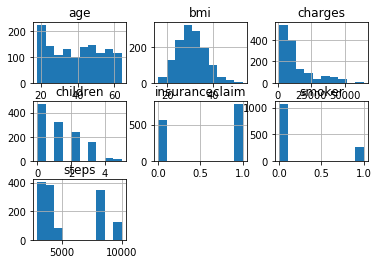

In [25]:
df.hist()

### Preparing the data

Now that we've looked at the data set, we need to prepare them before we proceed with the data analysis. Again, we will use the DataFrame for both tasks.

#### Missing Values

In [26]:
df.isnull().sum()

age                 5
sex                 0
bmi                 0
steps              13
children          104
smoker              0
region              0
charges             2
insuranceclaim      2
dtype: int64

In [27]:
df['age'].fillna(39, inplace=True)

In [28]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
steps              13
children          104
smoker              0
region              0
charges             2
insuranceclaim      2
dtype: int64

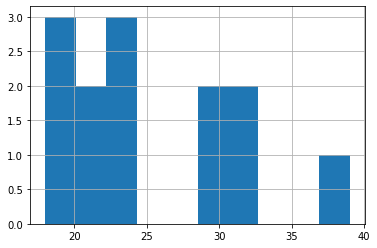

In [29]:
df[df.steps.isnull()].age.hist()

In [30]:
df.steps.min()

2908.0

In [31]:
min_steps = df[ (df.age >=20) & (df.age <=40)].steps.min()
min_steps

3000.0

In [32]:
df['steps'].fillna(min_steps, inplace=True)

In [33]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
steps               0
children          104
smoker              0
region              0
charges             2
insuranceclaim      2
dtype: int64

In [34]:
df[df.children.isnull()]

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
3,33.0,male,22.705,10009.0,NaN,0,northwest,21984.47061,0.0
4,32.0,male,28.880,8010.0,NaN,0,northwest,3866.85520,1.0
10,25.0,male,26.220,8006.0,NaN,0,northeast,2721.32080,1.0
11,62.0,female,26.290,5004.0,NaN,1,southeast,27808.72510,1.0
12,23.0,1,34.400,3008.0,NaN,0,southwest,1826.84300,1.0
13,56.0,female,39.820,4001.0,NaN,0,southeast,11090.71780,1.0
30,22.0,1,35.600,4008.0,NaN,1,southwest,35585.57600,1.0
31,18.0,female,26.315,8004.0,NaN,0,northeast,2198.18985,1.0
33,63.0,male,28.310,5002.0,NaN,0,northwest,13770.09790,1.0
35,19.0,male,20.425,10006.0,NaN,0,northwest,1625.43375,0.0


## Exercise: Try to fill in the NaN of children with 0

In [1]:
# Enter your code here
df['children'].fillna(0,inplace=True)

In [3]:
# Check if you fill the value correctly.
#df.isnull().sum()

##### Drop all NA

In [4]:
df.dropna(inplace=True)

NameError: name 'df' is not defined

In [5]:
df.isnull().sum()

NameError: name 'df' is not defined

In [89]:
df.sex.value_counts()

male      515
female    502
0         162
1         161
11          2
Name: sex, dtype: int64

In [90]:
 df['sex'].replace('0','female', inplace=True)
 df['sex'].replace('1','male', inplace=True)
 df['sex'].replace('11','male', inplace=True)

In [91]:
df.sex.value_counts()

male      678
female    664
Name: sex, dtype: int64

In [92]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19.0,female,27.900,3009.0,0.0,1,southwest,16884.92400,1.0
1,18.0,male,33.770,3008.0,1.0,0,southeast,1725.55230,1.0
2,28.0,male,33.000,3009.0,3.0,0,southeast,4449.46200,0.0
3,33.0,male,22.705,10009.0,0.0,0,northwest,21984.47061,0.0
4,32.0,male,28.880,8010.0,0.0,0,northwest,3866.85520,1.0


#### Transform data

In [93]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['sex_code'] = lb_make.fit_transform(df['sex'])
df['region_code'] = lb_make.fit_transform(df['region'])

In [94]:
df_med_claim.head()

,age,bmi,steps,children,smoker,charges,insuranceclaim,sex_code,region_code
0,19.0,27.900,3009.0,0.0,1,16884.92400,1.0,0,3
1,18.0,33.770,3008.0,1.0,0,1725.55230,1.0,1,2
2,28.0,33.000,3009.0,3.0,0,4449.46200,0.0,1,2
3,33.0,22.705,10009.0,0.0,0,21984.47061,0.0,1,1
4,32.0,28.880,8010.0,0.0,0,3866.85520,1.0,1,1


In [95]:
df.dtypes

age               float64
sex                object
bmi               float64
steps             float64
children          float64
smoker              int64
region             object
charges           float64
insuranceclaim    float64
sex_code            int64
region_code         int64
dtype: object

In [96]:
df = df.drop(columns=['sex','region'])

In [97]:
df.dtypes

age               float64
bmi               float64
steps             float64
children          float64
smoker              int64
charges           float64
insuranceclaim    float64
sex_code            int64
region_code         int64
dtype: object

## Data Visualization


#### Scatter Plot

One of the first plot that we can try is scatter plot to see the relationship between 2 variables

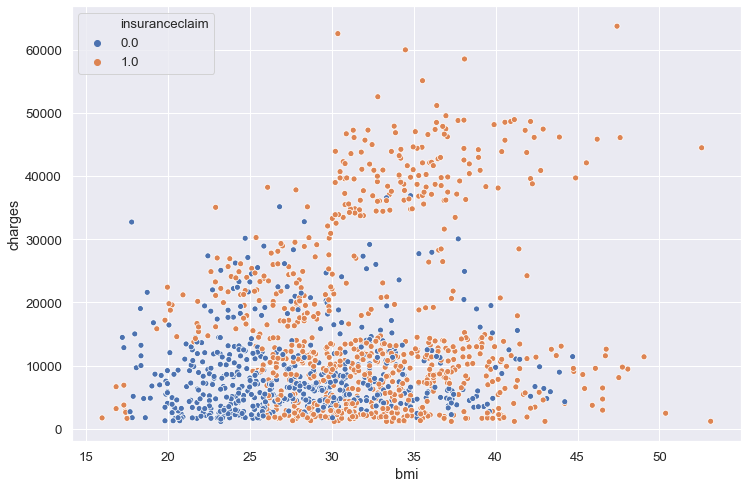

In [98]:
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="bmi", y="charges", hue='insuranceclaim', data=df)

#### Correlation Heat Map

Next we will plot the correlation value between features as heatmap. (Dataframe has .corr() function for the correlation.)

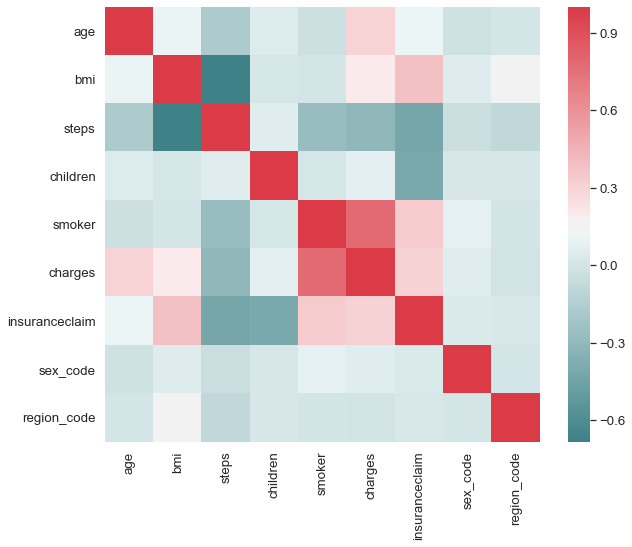

In [101]:
fi, axis = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True), 
           square=True, ax=axis)

#### Distribution Map

Representation of the distribution of numerical data in one variable.<br>
We can use 2 libraries for plotting distribution map <br>
1. matplotlib
2. seaborn

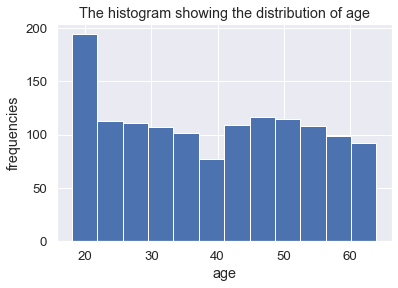

In [102]:
plt.hist(df.age, bins='auto') 
plt.title("The histogram showing the distribution of age")
plt.xlabel('age')
plt.ylabel('frequencies')
plt.show()

Text(0.5, 1.0, 'The histogram showing the distribution of age')

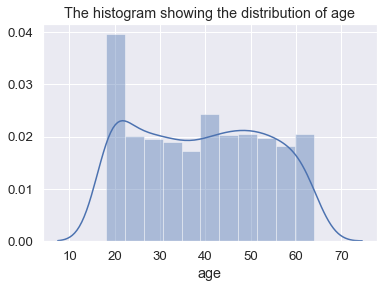

In [103]:
sns.distplot(df.age)
plt.title("The histogram showing the distribution of age")

Text(0.5, 1.0, 'The distribution of the medical charges for the smokers')

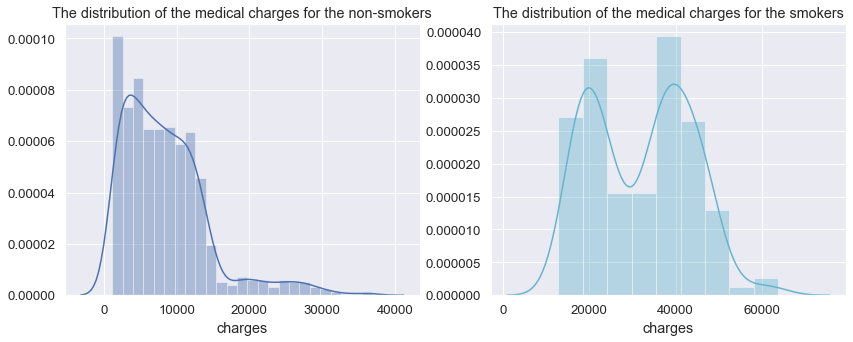

In [104]:
fi= plt.figure(figsize=(14,5))

axis=fi.add_subplot(121)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=axis)
axis.set_title('The distribution of the medical charges for the non-smokers')

axis=fi.add_subplot(122)
sns.distplot(df[(df.smoker == 1)]['charges'],color='c',ax=axis)
axis.set_title('The distribution of the medical charges for the smokers')

### Plotting with Categorical data

To show the relationship between multiple variables in a dataset, one of the main variables is “categorical” (divided into discrete groups)<br>
There are many kinds of catplot, the example are:
1. count
2. bar
3. box
4. swarm
5. violin

Text(0.5, 1, 'Smoker vs steps')

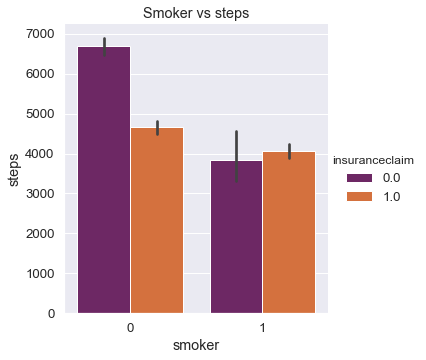

In [105]:
#Bar
sns.catplot(x='smoker', y='steps', hue='insuranceclaim', kind='bar', palette="inferno", data=df)
plt.title('Smoker vs steps')

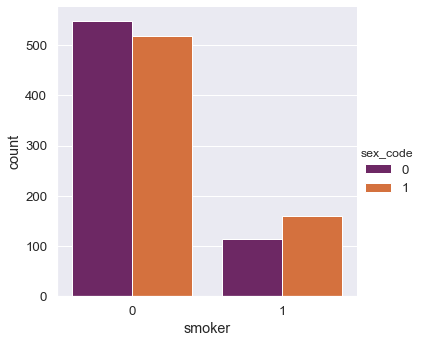

In [106]:
#Bar with Count function
sns.catplot(x="smoker", kind="count",hue = 'sex_code', palette="inferno", data=df)

Text(0.5, 1, 'The number of smokers and non-smokers (18 years old)')

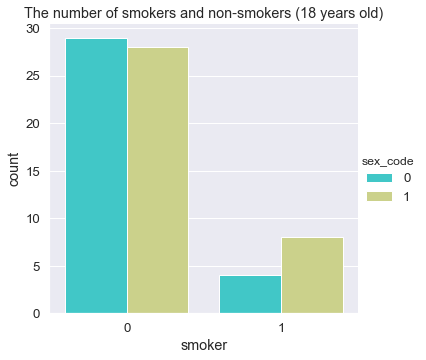

In [107]:
sns.catplot(x="smoker", kind="count",hue = 'sex_code', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

Text(0.5, 1, 'The number of smokers and non-smokers (> 30 years old)')

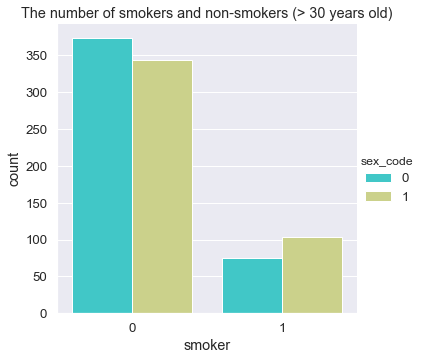

In [108]:
sns.catplot(x="smoker", kind="count",hue = 'sex_code', palette="rainbow", data=df[(df.age > 30)])
plt.title("The number of smokers and non-smokers (> 30 years old)")

Plot the graph of the number of smokers and non-smokers for age over 30-year old

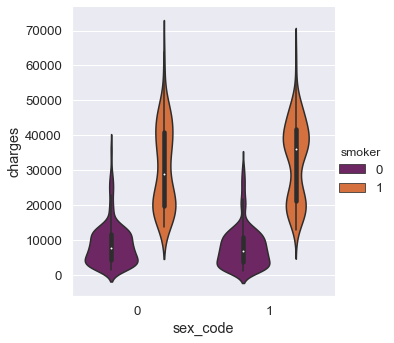

In [109]:
#violin
sns.catplot(x="sex_code", y="charges", hue="smoker", kind="violin", palette = 'inferno', data=df)

Text(0.5, 1, "The box plot of males' medical charges")

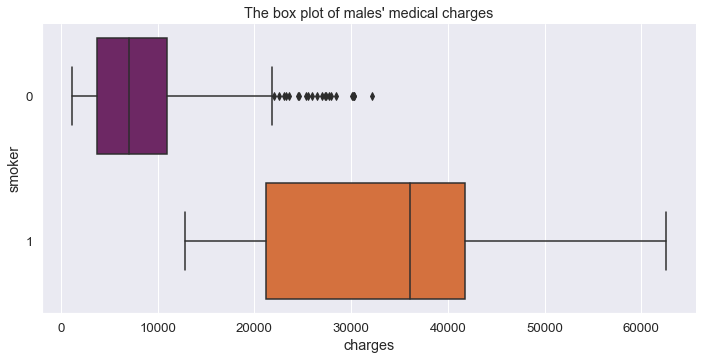

In [110]:
#box
sns.catplot(x='charges', y='smoker', data=df[(df.sex_code == 1)] , orient='h', kind='box' , palette = 'inferno', 
           height=5, aspect=2)
plt.title("The box plot of males' medical charges")

Text(0.5, 1, 'The box plot of 18-year old patients medical charges')

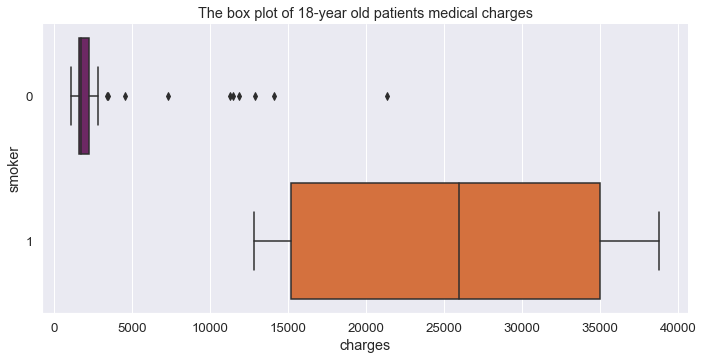

In [111]:
# create the box plot for charges 18 years old smokers
#box
sns.catplot(x='charges', y='smoker', data=df[(df.age == 18)] , orient='h', kind='box' , palette = 'inferno', 
           height=5, aspect=2)
plt.title("The box plot of 18-year old patients medical charges")

Text(0.5, 1, 'Distribution of charges and age for smokers')

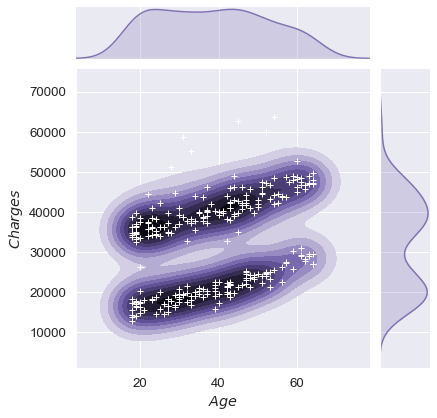

In [112]:
# JointPlot
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 1)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Age$", "$Charges$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1, 'Distribution of charges and age for smokers')

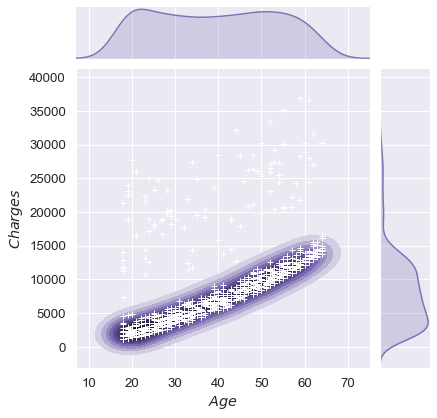

In [113]:
# Can you jointplot the Distribution of charges and age for non-smokers
# JointPlot
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Age$", "$Charges$")
ax.set_title('Distribution of charges and age for smokers')